In [1]:
import matplotlib.pyplot as plt
import argparse
from DataProcessing import getNodes, makeNodeMalicious
from Model import getModel
import random
import joblib

In [15]:
nodes, x_test, y_test = getNodes()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
print(x_test.shape)
print(y_test.shape)

(2500, 32, 32, 3)
(2500,)


In [17]:
epoch = 10
mnode = 10
position = "none"
model_name = "Generic"
model = getModel(model_name)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 13, 13, 64)      

In [19]:
if position == "front":
    for node_obj in nodes[:mnode]:
        makeNodeMalicious(node_obj)

elif position == "end":
    starting = len(nodes) - mnode
    for node_obj in nodes[starting:]:
        makeNodeMalicious(node_obj)

elif position == "random":
    for node_obj in nodes[:mnode]:
        makeNodeMalicious(node_obj)
    random.shuffle(nodes)

elif position == "none":
    print("Running federated learning without malicious nodes.")

else:
    print("Peleze, give correct position argument!")
    exit()

Running federated learning without malicious nodes.


Node:  0  says: Traning complete.
Node:  1  says: Traning complete.
Node:  2  says: Traning complete.
Node:  3  says: Traning complete.
Node:  4  says: Traning complete.
Node:  5  says: Traning complete.
Node:  6  says: Traning complete.
Node:  7  says: Traning complete.
Node:  8  says: Traning complete.
Node:  9  says: Traning complete.
Node:  10  says: Traning complete.
Node:  11  says: Traning complete.
Node:  12  says: Traning complete.
Node:  13  says: Traning complete.
Node:  14  says: Traning complete.
Node:  15  says: Traning complete.
Node:  16  says: Traning complete.
Node:  17  says: Traning complete.
Node:  18  says: Traning complete.
Node:  19  says: Traning complete.
Node:  20  says: Traning complete.
Node:  21  says: Traning complete.
Node:  22  says: Traning complete.
Node:  23  says: Traning complete.
Node:  24  says: Traning complete.
Node:  25  says: Traning complete.
Node:  26  says: Traning complete.
Node:  27  says: Traning complete.
Node:  28  says: Traning compl

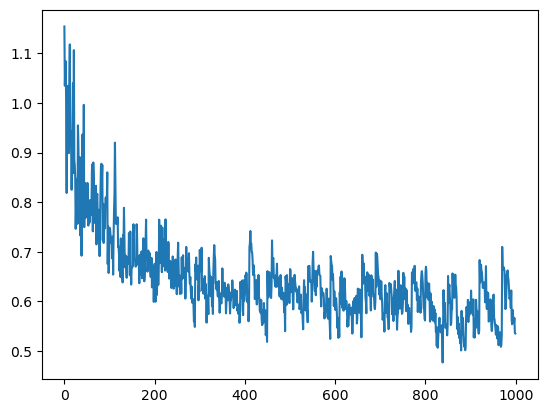

In [20]:
total_loss = []

for node_obj in nodes:
    node_obj.send_model(model)
    total_loss = total_loss + node_obj.train(epoch)
    model = node_obj.get_model()

plt.plot(total_loss)
# plt.savefig('loss_graph.png')

# joblib.dump(model, args.model+".model")

In [24]:
results = model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6636


# Riya ekhan theke dekho

In [32]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X1 = pca.transform(X)

X2 = pca.transform(X)

In [38]:

import numpy as np
gamma = 0.01
X_norm = np.sum(X ** 2, axis = -1)
K = np.exp(-gamma * (X_norm[:,None] + X_norm[None,:] - 2 * np.dot(X, X.T)))

In [39]:
K.shape

(150, 150)

In [1]:
import joblib
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
model = joblib.load("cifar10_version/ResNet50.model")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

result = model.evaluate(x_test, y_test)
print(result)

2022-11-29 08:17:15.731282: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 13s 41ms/step - loss: 6.5992 - accuracy: 0.0947
[6.599227428436279, 0.09470000118017197]
313/313 [==============================] - 14s 44ms/step


ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [7]:
y_pred = model.predict(x_test)

313/313 [==============================] - 17s 53ms/step


In [11]:
y1 = y_test.argmax(1)
y2 = y_pred.argmax(1)
print('Precision: %.3f' % precision_score(y1, y2, average='micro'))
print('Recall: %.3f' % recall_score(y1, y2, average='micro'))
print('F1: %.3f' % f1_score(y1, y2, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y1, y2))

Precision: 0.096
Recall: 0.096
F1: 0.096
Accuracy: 0.096


In [12]:
import joblib
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model = joblib.load("Generic.model")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(32, 32),
        batch_size=2500,
        class_mode='binary')

(x_test, y_test) = test_generator.next()

result = model.evaluate(x_test, y_test)
print(result)

y_pred = model.predict(x_test)

y1 = y_test
y2 = y_pred.argmax(1)
print('Precision: %.3f' % precision_score(y1, y2, average='micro'))
print('Recall: %.3f' % recall_score(y1, y2, average='micro'))
print('F1: %.3f' % f1_score(y1, y2, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y1, y2))

Found 5000 images belonging to 2 classes.
79/79 [==============================] - 0s 4ms/step - loss: 0.8104 - accuracy: 0.5196
[0.8104034066200256, 0.519599974155426]
79/79 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [13]:
y1 = y_test
y2 = y_pred.argmax(1)
print('Precision: %.3f' % precision_score(y1, y2, average='micro'))
print('Recall: %.3f' % recall_score(y1, y2, average='micro'))
print('F1: %.3f' % f1_score(y1, y2, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y1, y2))

Precision: 0.496
Recall: 0.496
F1: 0.496
Accuracy: 0.496
